In [1]:
# open libraries
import numpy as np
import pandas as pd                         
import geopandas                            
from shapely.geometry import Point          
import matplotlib.pyplot as plt             
import mapclassify
import matplotlib.colors as colors

In [2]:
# open dta
wi = pd.read_stata('WI.dta')

In [3]:
# data cleaning
# the 5-year (natural) log difference of “wap”
wi['diff_ln_wap'] = np.log(wi['wap']/wi['wap'].shift(5))

# the 5-year (natural) log difference of “emp_i” 
wi['diff_ln_emp_i'] = np.log(wi['emp_i']/wi['emp_i'].shift(5))

# the 5-year (natural) log difference of “emp_mfg” 
wi['diff_ln_emp_mfg'] = np.log(wi['emp_mfg']/wi['emp_mfg'].shift(5))

# only year 2011
wi_2011 = wi[wi['year']==2011]

C:\Users\jaeco\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [4]:
# WI state and counties
states = geopandas.read_file('cb_2018_us_state_5m.shp')
counties = geopandas.read_file('cb_2018_us_county_5m.shp')
wi_counties = counties[counties['STATEFP']=='55']
wi_counties.GEOID = wi_counties.GEOID.astype(int)

# merge out data with counties
wi_merge = pd.merge(left=wi_counties, right=wi_2011, left_on='GEOID', right_on='countyid', how='outer', indicator=True)

# to_crs
states=states.to_crs({'init': 'epsg:3395'})
wi_merge = wi_merge.to_crs({'init': 'epsg:3395'}) 

C:\Users\jaeco\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\jaeco\AppData\Roaming\Python\Python37\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\jaeco\AppData\Roaming\Python\Python37\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization metho

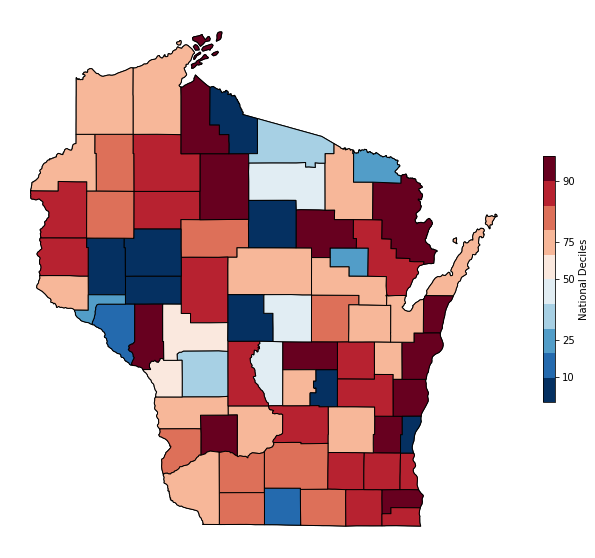

In [223]:
# d5_ipw
fig0, gax = plt.subplots(figsize=(10,10))

# Plot the state outline
states[states['NAME'] == 'Wisconsin'].plot(ax = gax, edgecolor='black',color='white')

bounds = np.array([-1000,-82.7358169555664,14.16261673,101.0846024,208.3595123,343.5816956,528.5739746,775.7293091,1175.365601,1917.061523,10000])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
# Plot the counties
wi_merge.plot(ax=gax, edgecolor='black', column = 'd5_ipw', cmap = 'RdBu_r', norm=norm)
cbar = fig0.colorbar(gax.collections[1], ax=gax,fraction=0.022, pad=0.04, ticks=np.array([-82.7358169555664,60.16261673,343.5816956,654.7293091,1917.061523]))
cbar.ax.set_yticklabels(['10', '25', '50','75','90'])
cbar.ax.set_ylabel("National Deciles")
gax.axis('off')


plt.savefig('d5_ipw.eps', format='eps')

plt.show()


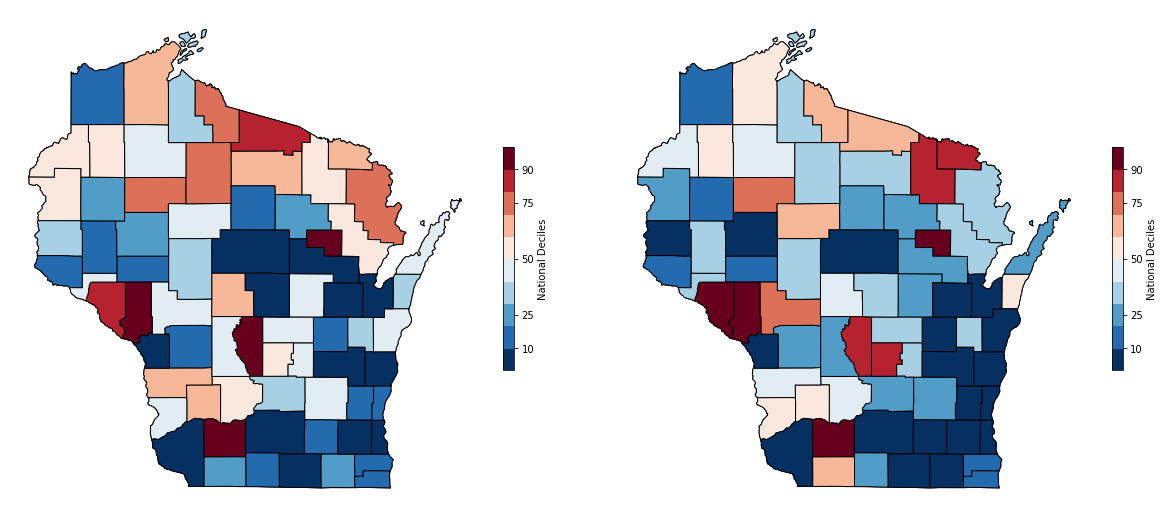

In [224]:
# hhi_2 and hhi_4
fig1, (gax1,gax2) = plt.subplots(1,2, figsize=(20,10))

# Plot the state outline
states[states['NAME'] == 'Wisconsin'].plot(ax = gax1, edgecolor='black',color='white')
states[states['NAME'] == 'Wisconsin'].plot(ax = gax2, edgecolor='black',color='white')

bounds1 = np.array([-10000,0.082367823,0.090027422,0.096534081,0.102905795,0.109497339,0.116499193,0.12603122,0.14238514,0.177733392,100000])
norm1 = colors.BoundaryNorm(boundaries=bounds1, ncolors=256)

bounds2 = np.array([-10000,0.019250404,0.023081442,0.027136451,0.031178368,0.036413431,0.042613953,0.051675696,0.064360283,0.097703241,100000])
norm2 = colors.BoundaryNorm(boundaries=bounds2, ncolors=256)

# Plot the counties
wi_merge.plot(ax=gax1, edgecolor='black', column = 'hhi_2', cmap = 'RdBu_r', norm=norm1)
wi_merge.plot(ax=gax2, edgecolor='black', column = 'hhi_4', cmap = 'RdBu_r', norm=norm2)

cbar1 = fig1.colorbar(gax1.collections[1], ax=gax1,fraction=0.022, pad=0.04, ticks=np.array([0.082367823,0.0932807515,0.109497339,0.13420818,0.177733392]))
cbar1.ax.set_yticklabels(['10', '25', '50','75','90'])
cbar1.ax.set_ylabel("National Deciles")

cbar2 = fig1.colorbar(gax2.collections[1], ax=gax2,fraction=0.022, pad=0.04, ticks=np.array([0.019250404,0.0251089465,0.036413431,0.0580179895,0.097703241]))
cbar2.ax.set_yticklabels(['10', '25', '50','75','90'])
cbar2.ax.set_ylabel("National Deciles")

gax1.axis('off')
gax2.axis('off')

plt.savefig('hhi_2_and_4.eps', format='eps')

plt.show()

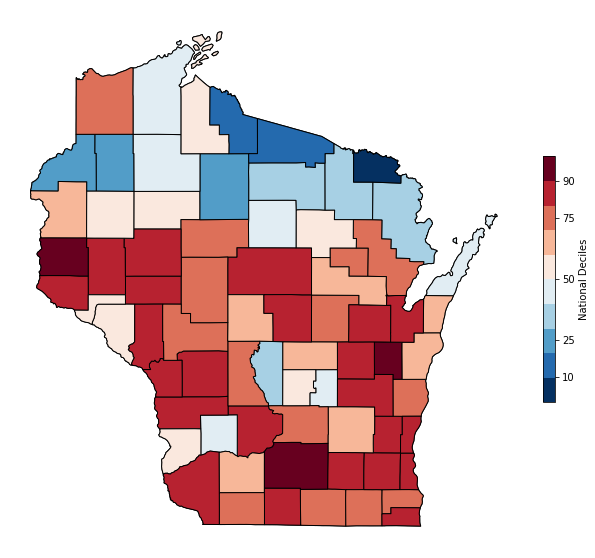

In [225]:
# d5_lnwap
fig2, gax3 = plt.subplots(figsize=(10,10))

# Plot the state outline
states[states['NAME'] == 'Wisconsin'].plot(ax = gax3, edgecolor='black',color='white')

bounds3 = np.array([-1000,-0.07845401,-0.061138663,-0.048925702,-0.039023004,-0.029199155,-0.018579926,-0.006312653,0.01089792,0.040535949,1000])
norm3 = colors.BoundaryNorm(boundaries=bounds3, ncolors=256)

# Plot the counties
wi_merge.plot(ax=gax3, edgecolor='black', column = 'diff_ln_wap', cmap = 'RdBu_r', norm=norm3)

cbar3 = fig2.colorbar(gax3.collections[1], ax=gax3,fraction=0.022, pad=0.04, ticks=np.array([-0.07845401,-0.0550321825,-0.029199155,0.0022926335000000003,0.040535949]))
cbar3.ax.set_yticklabels(['10', '25', '50','75','90'])
cbar3.ax.set_ylabel("National Deciles")

plt.axis('off')

plt.savefig('d5_lnwap.eps', format='eps')

plt.show()

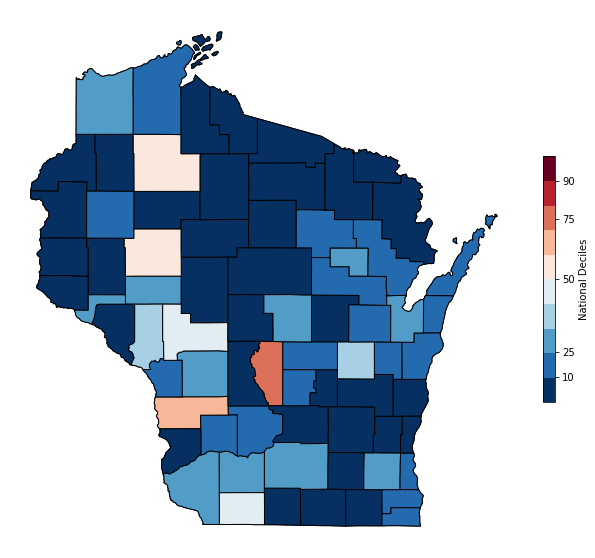

In [226]:
# d5_lnemp_i
fig3, gax4 = plt.subplots(figsize=(10,10))

# Plot the state outline
states[states['NAME'] == 'Wisconsin'].plot(ax = gax4, edgecolor='black',color='white')

bounds4 = np.array([-1000,-0.092724621,-0.03305671,0.001393395,0.027534578,0.052899037,0.075247914,0.102248318,0.134410441,0.186359346,1000])
norm4 = colors.BoundaryNorm(boundaries=bounds4, ncolors=256)

# Plot the counties
wi_merge.plot(ax=gax4, edgecolor='black', column = 'diff_ln_emp_i', cmap = 'RdBu_r', norm=norm4)

cbar4 = fig3.colorbar(gax4.collections[1], ax=gax4,fraction=0.022, pad=0.04, ticks=np.array([-0.092724621,-0.031663315,0.052899037,0.117,0.186359346]))
cbar4.ax.set_yticklabels(['10', '25', '50','75','90'])
cbar4.ax.set_ylabel("National Deciles")


plt.axis('off')

plt.savefig('d5_lnemp_i.eps', format='eps')

plt.show()

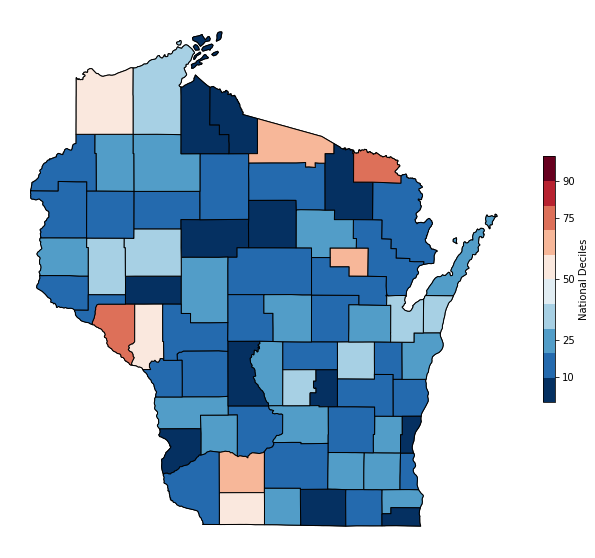

In [227]:
#d5_lnemp_mfg
fig4, gax5 = plt.subplots(figsize=(10,10))

# Plot the state outline
states[states['NAME'] == 'Wisconsin'].plot(ax = gax5, edgecolor='black',color='white')

bounds5 = np.array([-1000,-0.287581533,-0.12652196,-0.049468081,0.008048796,0.056914363,0.110311024,0.171265081,0.252119243,0.398030132,1000])
norm5 = colors.BoundaryNorm(boundaries=bounds5, ncolors=256)

# Plot the counties
wi_merge.plot(ax=gax5, edgecolor='black', column = 'diff_ln_emp_mfg', cmap = 'RdBu_r', norm=norm5)

cbar5 = fig4.colorbar(gax5.collections[1], ax=gax5,fraction=0.022, pad=0.04, ticks=np.array([-0.287581533,-0.0879950205,0.056914363,0.211692162,0.398030132]))
cbar5.ax.set_yticklabels(['10', '25', '50','75','90'])
cbar5.ax.set_ylabel("National Deciles")


plt.axis('off')

plt.savefig('d5_lnemp_mfg.eps', format='eps')


plt.show()